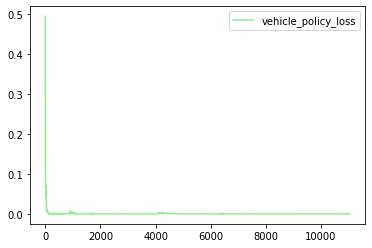

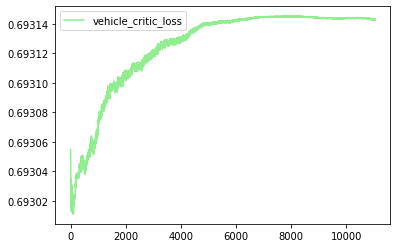

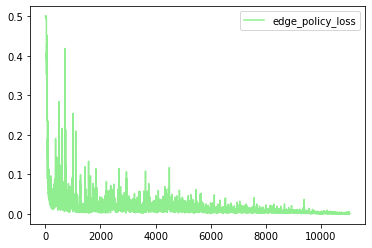

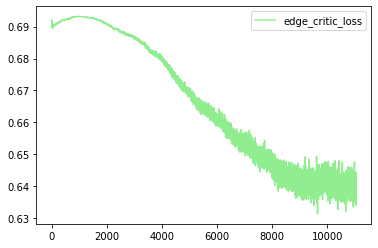

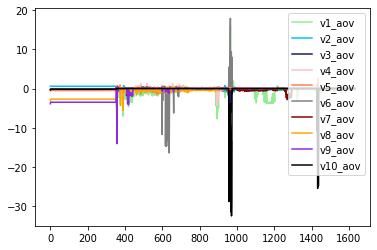

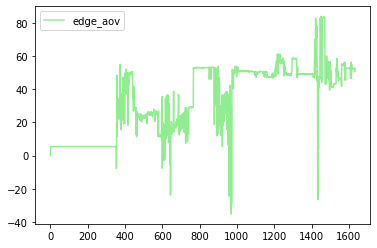

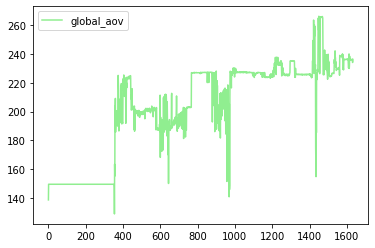

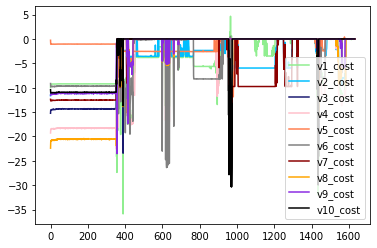

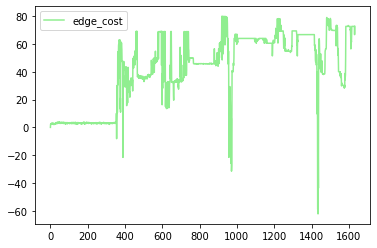

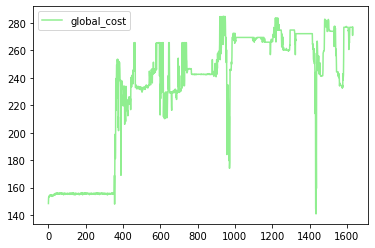

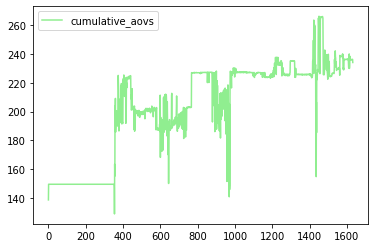

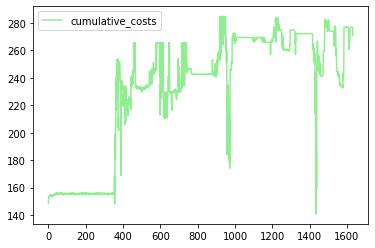

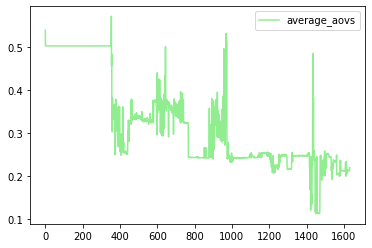

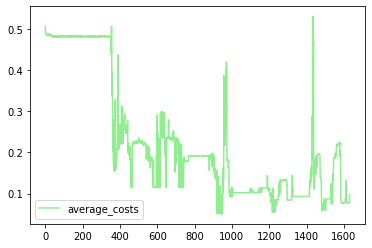

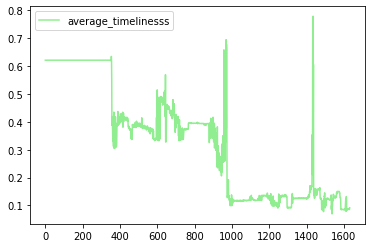

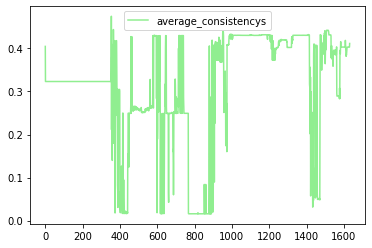

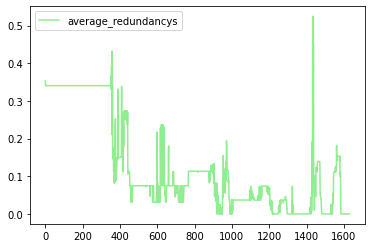

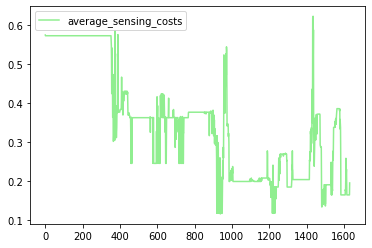

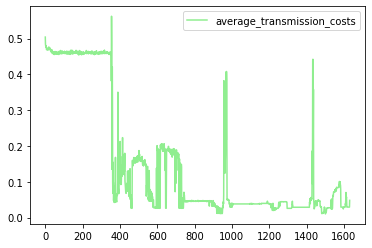

cumulative_aovs:  202.82600313290794
cumulative_costs:  231.8260406725128
average_aovs:  0.32391332289030683
average_costs:  0.2272465310916239
average_timelinesss:  0.33251220976646645
average_consistencys:  0.31100918624355167
average_redundancys:  0.12669906169538525
average_sensing_costs:  0.35007118392642383
average_transmission_costs:  0.15469050674579315
********************************
cumulative_aovs:  242.81404611545352
cumulative_costs:  282.16526494523663
average_aovs:  0.1906198462818219
average_costs:  0.0594491168492104
average_timelinesss:  0.0846035327107839
average_consistencys:  0.3496443166383789
average_redundancys:  0.0
average_sensing_costs:  0.1369010746555276
average_transmission_costs:  0.0117217174674988


In [85]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', None)

# different bandwidth 
# # bandwidth=2 power=100 information=10
# file_name = "/home/neardws/acme/adc0f128-0272-11ed-b8f5-04d9f5632a58/"
# # bandwidth=2.5 power=100 information=10
# file_name = "/home/neardws/acme/067704ec-0273-11ed-89b3-04d9f5632a58/"
# # bandwidth=3 power=100 information=10
# file_name = "/home/neardws/acme/28745f22-01ec-11ed-bc20-04d9f5632a58/"
# # bandwidth=3.5 power=100 information=10
# file_name = "/home/neardws/acme/fed3332c-02b9-11ed-b8e5-04d9f5632a58/"
# # bandwidth=4 power=100 information=10
file_name = "/home/neardws/acme/4aef9b42-02ba-11ed-aefe-04d9f5632a58/"


loss_file_name = file_name + "logs/learner/logs.csv"
returns_file_name = file_name + "logs/evaluator/logs.csv"

loss_df = pd.read_csv(loss_file_name, names=["edge_critic_loss", "edge_policy_loss", "evaluator_episodes", "evaluator_steps", "learner_steps", "learner_walltime",  "vehicle_critic_loss", "vehicle_policy_loss"], header=0)

vehicle_policy_loss = loss_df["vehicle_policy_loss"].values.tolist()
epoch_index = [i for i in range(len(vehicle_policy_loss))]
plt.plot(epoch_index, vehicle_policy_loss, '-', color='lightgreen', label='vehicle_policy_loss')
plt.legend(loc="best")  # 图例
plt.show()

vehicle_critic_loss = loss_df["vehicle_critic_loss"].values.tolist()
plt.plot(epoch_index, vehicle_critic_loss, '-', color='lightgreen', label='vehicle_critic_loss')
plt.legend(loc="best")  # 图例
plt.show()

edge_policy_loss = loss_df["edge_policy_loss"].values.tolist()
plt.plot(epoch_index, edge_policy_loss, '-', color='lightgreen', label='edge_policy_loss')
plt.legend(loc="best")  # 图例
plt.show()

edge_critic_loss = loss_df["edge_critic_loss"].values.tolist()
plt.plot(epoch_index, edge_critic_loss, '-', color='lightgreen', label='edge_critic_loss')
plt.legend(loc="best")  # 图例
plt.show()

returns_df = pd.read_csv(returns_file_name, names=["average_aovs", "average_consistencys", "average_costs", "average_redundancys", "average_sensing_costs", "average_timelinesss", "average_transmission_costs", "cumulative_aovs", "cumulative_costs", "episode_length", "episode_return", "evaluator_episodes", "evaluator_steps", "label", "steps_per_second"], header=0)
episode_return = returns_df["episode_return"].values
returns = np.zeros(shape=(len(episode_return), 2, 12))

for ret_index in range(episode_return.shape[0]):
    process_str = episode_return[ret_index].replace("[", "").replace("]", "").replace("\n", "").split(" ")
    while "" in process_str:
        process_str.remove("")
    for index in range(len(process_str)):
        s = process_str[index]
        f_s = float(s)
        returns[ret_index][index % 2][int(np.floor(index / 2))] = f_s

epoch_index = [i for i in range(episode_return.shape[0])]

v1_return = returns[:, 0, 0].tolist()
v2_return = returns[:, 0, 1].tolist()
v3_return = returns[:, 0, 2].tolist()
v4_return = returns[:, 0, 3].tolist()
v5_return = returns[:, 0, 4].tolist()
v6_return = returns[:, 0, 5].tolist()
v7_return = returns[:, 0, 6].tolist()
v8_return = returns[:, 0, 7].tolist()
v9_return = returns[:, 0, 8].tolist()
v10_return = returns[:, 0, 9].tolist()
plt.plot(epoch_index, v1_return, '-', color='lightgreen', label='v1_aov')
plt.plot(epoch_index, v2_return, '-', color='deepskyblue', label='v2_aov')
plt.plot(epoch_index, v3_return, '-', color='midnightblue', label='v3_aov')
plt.plot(epoch_index, v4_return, '-', color='pink', label='v4_aov')
plt.plot(epoch_index, v5_return, '-', color='coral', label='v5_aov')
plt.plot(epoch_index, v6_return, '-', color='gray', label='v6_aov')
plt.plot(epoch_index, v7_return, '-', color='darkred', label='v7_aov')
plt.plot(epoch_index, v8_return, '-', color='orange', label='v8_aov')
plt.plot(epoch_index, v9_return, '-', color='blueviolet', label='v9_aov')
plt.plot(epoch_index, v10_return, '-', color='black', label='v10_aov')
plt.legend(loc="best")  # 图例
plt.show()

edge_return = returns[:, 0, 10].tolist()
plt.plot(epoch_index, edge_return, '-', color='lightgreen', label='edge_aov')
plt.legend(loc="best")  # 图例
plt.show()

global_return = returns[:, 0, 11].tolist()
plt.plot(epoch_index, global_return, '-', color='lightgreen', label='global_aov')
plt.legend(loc="best")  # 图例
plt.show()


v1_return = returns[:, 1, 0].tolist()
v2_return = returns[:, 1, 1].tolist()
v3_return = returns[:, 1, 2].tolist()
v4_return = returns[:, 1, 3].tolist()
v5_return = returns[:, 1, 4].tolist()
v6_return = returns[:, 1, 5].tolist()
v7_return = returns[:, 1, 6].tolist()
v8_return = returns[:, 1, 7].tolist()
v9_return = returns[:, 1, 8].tolist()
v10_return = returns[:, 1, 9].tolist()
plt.plot(epoch_index, v1_return, '-', color='lightgreen', label='v1_cost')
plt.plot(epoch_index, v2_return, '-', color='deepskyblue', label='v2_cost')
plt.plot(epoch_index, v3_return, '-', color='midnightblue', label='v3_cost')
plt.plot(epoch_index, v4_return, '-', color='pink', label='v4_cost')
plt.plot(epoch_index, v5_return, '-', color='coral', label='v5_cost')
plt.plot(epoch_index, v6_return, '-', color='gray', label='v6_cost')
plt.plot(epoch_index, v7_return, '-', color='darkred', label='v7_cost')
plt.plot(epoch_index, v8_return, '-', color='orange', label='v8_cost')
plt.plot(epoch_index, v9_return, '-', color='blueviolet', label='v9_cost')
plt.plot(epoch_index, v10_return, '-', color='black', label='v10_cost')
plt.legend(loc="best")  # 图例
plt.show()

edge_return = returns[:, 1, 10].tolist()
plt.plot(epoch_index, edge_return, '-', color='lightgreen', label='edge_cost')
plt.legend(loc="best")  # 图例
plt.show()

global_return = returns[:, 1, 11].tolist()
plt.plot(epoch_index, global_return, '-', color='lightgreen', label='global_cost')
plt.legend(loc="best")  # 图例
plt.show()

start_index = 0
end_index = -1
epoch_index = epoch_index[start_index: end_index]
cumulative_aovs = returns_df["cumulative_aovs"].values
cumulative_costs = returns_df["cumulative_costs"].values
average_aovs = returns_df["average_aovs"].values
average_costs = returns_df["average_costs"].values
average_timelinesss = returns_df["average_timelinesss"].values
average_consistencys = returns_df["average_consistencys"].values
average_redundancys = returns_df["average_redundancys"].values
average_sensing_costs = returns_df["average_sensing_costs"].values
average_transmission_costs = returns_df["average_transmission_costs"].values

plt.plot(epoch_index, cumulative_aovs[start_index:end_index], '-', color='lightgreen', label='cumulative_aovs')
plt.legend(loc="best")  # 图例
plt.show()

plt.plot(epoch_index, cumulative_costs[start_index:end_index], '-', color='lightgreen', label='cumulative_costs')
plt.legend(loc="best")  # 图例
plt.show()

plt.plot(epoch_index, average_aovs[start_index:end_index], '-', color='lightgreen', label='average_aovs')
plt.legend(loc="best")  # 图例
plt.show()

plt.plot(epoch_index, average_costs[start_index:end_index], '-', color='lightgreen', label='average_costs')
plt.legend(loc="best")  # 图例
plt.show()

plt.plot(epoch_index, average_timelinesss[start_index:end_index], '-', color='lightgreen', label='average_timelinesss')
plt.legend(loc="best")  # 图例
plt.show()

plt.plot(epoch_index, average_consistencys[start_index:end_index], '-', color='lightgreen', label='average_consistencys')
plt.legend(loc="best")  # 图例
plt.show()

plt.plot(epoch_index, average_redundancys[start_index:end_index], '-', color='lightgreen', label='average_redundancys')
plt.legend(loc="best")  # 图例
plt.show()

plt.plot(epoch_index, average_sensing_costs[start_index:end_index], '-', color='lightgreen', label='average_sensing_costs')
plt.legend(loc="best")  # 图例
plt.show()

plt.plot(epoch_index, average_transmission_costs[start_index:end_index], '-', color='lightgreen', label='average_transmission_costs')
plt.legend(loc="best")  # 图例
plt.show()


print("cumulative_aovs: ", cumulative_aovs[start_index:end_index].mean())
print("cumulative_costs: ", cumulative_costs[start_index:end_index].mean())
print("average_aovs: ", average_aovs[start_index:end_index].mean())
print("average_costs: ", average_costs[start_index:end_index].mean())
print("average_timelinesss: ", average_timelinesss[start_index:end_index].mean())
print("average_consistencys: ", average_consistencys[start_index:end_index].mean())
print("average_redundancys: ", average_redundancys[start_index:end_index].mean())
print("average_sensing_costs: ", average_sensing_costs[start_index:end_index].mean())
print("average_transmission_costs: ", average_transmission_costs[start_index:end_index].mean())
print("*"*32)

max_value = 0
max_index = 0
for i in range(len(cumulative_aovs)):
    if cumulative_aovs[i] + cumulative_costs[i] > max_value:
        max_value = cumulative_aovs[i] + cumulative_costs[i]
        max_index = i
# max_index = cumulative_aovs.argmax()
# max_index = cumulative_costs.argmax()
print("cumulative_aovs: ", cumulative_aovs[max_index])
print("cumulative_costs: ", cumulative_costs[max_index])
print("average_aovs: ", average_aovs[max_index])
print("average_costs: ", average_costs[max_index])
print("average_timelinesss: ", average_timelinesss[max_index])
print("average_consistencys: ", average_consistencys[max_index])
print("average_redundancys: ", average_redundancys[max_index])
print("average_sensing_costs: ", average_sensing_costs[max_index])
print("average_transmission_costs: ", average_transmission_costs[max_index])
